 # Self Organizing Maps
 
Self-organizing map (SOM) is a form of artificial neural network. It is trained by using unsupervised learning to generate a two-dimensional presentation of the input metrics. Therefore, SOM is one algorithm can realize dimensionality reduction. SOM is an appro- priate tool for visualizing low-dimensional graphs of high-dimensional input data for its function of preserving the topological properties of the input data space.

Experiments
Regarding the SOM, we intended to explore the influence of changing inherent variables of the algorithm. In the first experiment, the number of iterations were set as 500, 1000, and 2000 and the other parameters were fixed as following: OP learning rate = 1.0; Tuning phase (TP) learning rate = 1; TP Neighborhood distance = 1; and Map size = 20x20. In the second experiment, the number of iterations was fixed as 500, and the Neighbourhood distance was fixed at 1. While the Map size were set as 10×10, 20×20, 30×30. In the third experiment, the OP steps were fixed in 500 iterations and the TP Neighborhood distances were set as 1, 10 and 20, while the other variables were not mod- ified.

Results
SOM neighborhood weight distance graph, which indicates the distances between neighboring neurons.



In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import sompy
import csv

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [19]:
data_location = './data/01/01_Gang_08_06.csv'
data = pd.read_csv(data_location, engine='python', sep=None)
data.head()

,"﻿""Time,s""","Lumbar Flexion,deg","Lumbar Lateral - RT,deg","Lumbar Axial - RT,deg","Thoracic Flexion,deg","Thoracic Lateral - RT,deg","Thoracic Axial - RT,deg","LT Ellbogen Flexion,deg","RT Ellbogen Flexion,deg","LT Shoulder Total Flexion,deg",...,"LT Foot Rot Z,","RT Thigh Rot X,","RT Thigh Rot Y,","RT Thigh Rot Z,","RT Shank Rot X,","RT Shank Rot Y,","RT Shank Rot Z,","RT Foot Rot X,","RT Foot Rot Y,","RT Foot Rot Z,"
0,0.00,0.719490,1.87061,-1.55251,5.80509,-1.251980,-1.417990,2.31042,9.04752,8.12528,...,0.047914,-0.655245,-0.484094,-0.486780,-0.494832,-0.613001,-0.430804,-0.304699,-0.078860,-0.372389
1,0.01,0.681719,1.80193,-1.66907,5.87781,-1.213060,-1.233560,2.42946,8.80080,8.23050,...,0.047792,-0.655669,-0.483787,-0.486594,-0.495939,-0.612889,-0.431177,-0.304576,-0.078860,-0.372205
2,0.02,0.650586,1.75768,-1.72881,5.93643,-1.160070,-1.058130,2.64165,8.50994,8.22476,...,0.047731,-0.656793,-0.482462,-0.486979,-0.495636,-0.613991,-0.430203,-0.304451,-0.078981,-0.372018
3,0.03,0.632959,1.72961,-1.73464,5.96863,-1.088580,-0.889963,2.88610,8.21334,8.11724,...,0.047731,-0.658260,-0.480876,-0.487469,-0.493809,-0.615948,-0.428252,-0.304158,-0.079168,-0.371850
4,0.04,0.622200,1.73556,-1.69821,5.98346,-0.983424,-0.747057,3.12327,7.93484,7.96955,...,0.047669,-0.659626,-0.479628,-0.487685,-0.491002,-0.618392,-0.425751,-0.303903,-0.079287,-0.371532


In [13]:
new_data = pd.DataFrame(data)
new_data.iloc[:, 87:177]

,"Upper spine Accel Earth X,mG","Upper spine Accel Earth Y,mG","Upper spine Accel Earth Z,mG","LT Upper arm Accel Earth X,mG","LT Upper arm Accel Earth Y,mG","LT Upper arm Accel Earth Z,mG","LT Forearm Accel Earth X,mG","LT Forearm Accel Earth Y,mG","LT Forearm Accel Earth Z,mG","LT Hand Accel Earth X,mG",...,"LT Foot Rot Z,","RT Thigh Rot X,","RT Thigh Rot Y,","RT Thigh Rot Z,","RT Shank Rot X,","RT Shank Rot Y,","RT Shank Rot Z,","RT Foot Rot X,","RT Foot Rot Y,","RT Foot Rot Z,"
0,15.72380,-13.80480,-11.279700,-7.029150,79.793900,111.288000,26.87180,-16.14950,88.676100,-8.81652,...,0.047914,-0.655245,-0.484094,-0.486780,-0.494832,-0.613001,-0.430804,-0.304699,-0.078860,-0.372389
1,4.06126,5.20956,-13.153600,-59.636800,91.542400,146.771000,11.12690,-28.57080,106.773000,-1.84704,...,0.047792,-0.655669,-0.483787,-0.486594,-0.495939,-0.612889,-0.431177,-0.304576,-0.078860,-0.372205
2,15.31770,26.98160,-5.101850,-95.063700,63.909100,133.734000,-13.52370,-51.52940,107.499000,2.62279,...,0.047731,-0.656793,-0.482462,-0.486979,-0.495636,-0.613991,-0.430203,-0.304451,-0.078981,-0.372018
3,16.13670,48.80280,-7.471430,-126.362000,0.547195,119.455000,-30.71510,-60.67030,92.596400,9.24750,...,0.047731,-0.658260,-0.480876,-0.487469,-0.493809,-0.615948,-0.428252,-0.304158,-0.079168,-0.371850
4,15.65610,57.96600,-8.245170,-148.248000,-70.491500,85.180500,-43.88760,-67.20460,66.144100,8.05308,...,0.047669,-0.659626,-0.479628,-0.487685,-0.491002,-0.618392,-0.425751,-0.303903,-0.079287,-0.371532
5,-3.12040,41.94410,4.775430,-160.472000,-141.337000,72.374300,-62.71130,-69.89980,51.465900,7.08031,...,0.047548,-0.660365,-0.479327,-0.487445,-0.488073,-0.620469,-0.423677,-0.303658,-0.079287,-0.371164
6,1.52974,48.51880,3.348840,-173.420000,-183.037000,52.236100,-73.01170,-67.06710,54.779100,22.33680,...,0.047365,-0.659968,-0.480448,-0.486675,-0.486110,-0.621676,-0.422569,-0.303357,-0.079288,-0.370804
7,1.48913,42.20070,-6.395440,-170.387000,-178.852000,29.712600,-68.34190,-50.83340,57.617000,29.65110,...,0.047122,-0.658079,-0.483442,-0.485090,-0.485388,-0.621995,-0.422212,-0.302993,-0.079227,-0.370379
8,9.17167,38.99530,-8.063820,-149.802000,-157.335000,1.187180,-68.00100,-37.67180,52.218300,44.19340,...,0.047000,-0.654823,-0.488065,-0.482572,-0.485391,-0.622120,-0.422214,-0.302687,-0.079044,-0.369951
9,5.61807,23.98370,-18.158700,-108.841000,-104.257000,-27.569100,-58.88870,-15.88790,20.987600,47.86290,...,0.046815,-0.650681,-0.494115,-0.478977,-0.485731,-0.622148,-0.422130,-0.302317,-0.078860,-0.369457


def plot_one_type(som, data, color):
    proj = som.project_data(data)
    coord = som.bmu_ind_to_xy(proj)
    plt.subplot(321)
    plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c=color,
                            marker='o', cmap='jet', linewidths=3, edgecolor=color)

In [20]:
data = data.values
mapsize = [50,50]
som = sompy.SOMFactory.build(data, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy') 
som.train(n_job=1, verbose='debug', train_rough_len=500)

 Training...
--------------------------------------------------------------
 details: 
      > data len is 1372 and data dimension is 177
      > map size is 50,50
      > array size in log10 scale is 8.783267386404576
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 pca_linear_initialization took: 0.071000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 500

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.064000 seconds
 epoch: 1 ---> elapsed time:  0.446000, quantization error: 10.502275

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.074000 seconds
 epoch: 2 ---> elapsed time:  0.477000, quantization error: 9.530948

 find_bmu took: 0.307000 seconds
 update_codebook_voronoi took: 0.111000 seconds
 epoch: 3 ---> elapsed time:  0.646000, quantization error: 7.270173

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.067000 seconds
 epoch: 4 --

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.063000 seconds
 epoch: 52 ---> elapsed time:  0.492000, quantization error: 6.635532

 find_bmu took: 0.205000 seconds
 update_codebook_voronoi took: 0.078000 seconds
 epoch: 53 ---> elapsed time:  0.484000, quantization error: 6.630278

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.060000 seconds
 epoch: 54 ---> elapsed time:  0.518000, quantization error: 6.625139

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.064000 seconds
 epoch: 55 ---> elapsed time:  0.484000, quantization error: 6.619626

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.061000 seconds
 epoch: 56 ---> elapsed time:  0.487000, quantization error: 6.614678

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.056000 seconds
 epoch: 57 ---> elapsed time:  0.496000, quantization error: 6.610136

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.065000 seconds
 epoch:

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.099000 seconds
 epoch: 106 ---> elapsed time:  0.492000, quantization error: 6.349894

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.067000 seconds
 epoch: 107 ---> elapsed time:  0.583000, quantization error: 6.345000

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.045000 seconds
 epoch: 108 ---> elapsed time:  0.457000, quantization error: 6.339825

 find_bmu took: 0.204000 seconds
 update_codebook_voronoi took: 0.043000 seconds
 epoch: 109 ---> elapsed time:  0.453000, quantization error: 6.334911

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.047000 seconds
 epoch: 110 ---> elapsed time:  0.457000, quantization error: 6.329753

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.042000 seconds
 epoch: 111 ---> elapsed time:  0.460000, quantization error: 6.324688

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.043000 seconds
 

 find_bmu took: 0.303000 seconds
 update_codebook_voronoi took: 0.060000 seconds
 epoch: 160 ---> elapsed time:  0.568000, quantization error: 6.055856

 find_bmu took: 0.304000 seconds
 update_codebook_voronoi took: 0.059000 seconds
 epoch: 161 ---> elapsed time:  0.597000, quantization error: 6.050432

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.076000 seconds
 epoch: 162 ---> elapsed time:  0.522000, quantization error: 6.044954

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.041000 seconds
 epoch: 163 ---> elapsed time:  0.494000, quantization error: 6.039296

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.041000 seconds
 epoch: 164 ---> elapsed time:  0.441000, quantization error: 6.033858

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.041000 seconds
 epoch: 165 ---> elapsed time:  0.434000, quantization error: 6.028249

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.040000 seconds
 

 find_bmu took: 0.216000 seconds
 update_codebook_voronoi took: 0.061000 seconds
 epoch: 214 ---> elapsed time:  0.469000, quantization error: 5.738252

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.042000 seconds
 epoch: 215 ---> elapsed time:  0.464000, quantization error: 5.732013

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.047000 seconds
 epoch: 216 ---> elapsed time:  0.448000, quantization error: 5.725812

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.047000 seconds
 epoch: 217 ---> elapsed time:  0.452000, quantization error: 5.719449

 find_bmu took: 0.204000 seconds
 update_codebook_voronoi took: 0.049000 seconds
 epoch: 218 ---> elapsed time:  0.448000, quantization error: 5.713131

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.041000 seconds
 epoch: 219 ---> elapsed time:  0.445000, quantization error: 5.706549

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.044000 seconds
 

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.068000 seconds
 epoch: 268 ---> elapsed time:  0.504000, quantization error: 5.379656

 find_bmu took: 0.204000 seconds
 update_codebook_voronoi took: 0.074000 seconds
 epoch: 269 ---> elapsed time:  0.494000, quantization error: 5.372947

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.067000 seconds
 epoch: 270 ---> elapsed time:  0.494000, quantization error: 5.366136

 find_bmu took: 0.304000 seconds
 update_codebook_voronoi took: 0.072000 seconds
 epoch: 271 ---> elapsed time:  0.664000, quantization error: 5.358690

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.104000 seconds
 epoch: 272 ---> elapsed time:  0.520000, quantization error: 5.351576

 find_bmu took: 0.204000 seconds
 update_codebook_voronoi took: 0.068000 seconds
 epoch: 273 ---> elapsed time:  0.496000, quantization error: 5.344352

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.074000 seconds
 

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.061000 seconds
 epoch: 322 ---> elapsed time:  0.499000, quantization error: 4.995118

 find_bmu took: 0.405000 seconds
 update_codebook_voronoi took: 0.087000 seconds
 epoch: 323 ---> elapsed time:  0.706000, quantization error: 4.987547

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.067000 seconds
 epoch: 324 ---> elapsed time:  0.512000, quantization error: 4.980395

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.059000 seconds
 epoch: 325 ---> elapsed time:  0.494000, quantization error: 4.973174

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.063000 seconds
 epoch: 326 ---> elapsed time:  0.478000, quantization error: 4.965658

 find_bmu took: 0.204000 seconds
 update_codebook_voronoi took: 0.073000 seconds
 epoch: 327 ---> elapsed time:  0.490000, quantization error: 4.957619

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.060000 seconds
 

 find_bmu took: 0.204000 seconds
 update_codebook_voronoi took: 0.059000 seconds
 epoch: 376 ---> elapsed time:  0.482000, quantization error: 4.574420

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.062000 seconds
 epoch: 377 ---> elapsed time:  0.470000, quantization error: 4.566272

 find_bmu took: 0.204000 seconds
 update_codebook_voronoi took: 0.120000 seconds
 epoch: 378 ---> elapsed time:  0.539000, quantization error: 4.557965

 find_bmu took: 0.406000 seconds
 update_codebook_voronoi took: 0.118000 seconds
 epoch: 379 ---> elapsed time:  0.809000, quantization error: 4.549982

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.075000 seconds
 epoch: 380 ---> elapsed time:  0.569000, quantization error: 4.541814

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.112000 seconds
 epoch: 381 ---> elapsed time:  0.557000, quantization error: 4.533727

 find_bmu took: 0.307000 seconds
 update_codebook_voronoi took: 0.089000 seconds
 

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.062000 seconds
 epoch: 430 ---> elapsed time:  0.472000, quantization error: 4.076793

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.063000 seconds
 epoch: 431 ---> elapsed time:  0.506000, quantization error: 4.066729

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.064000 seconds
 epoch: 432 ---> elapsed time:  0.460000, quantization error: 4.055939

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.058000 seconds
 epoch: 433 ---> elapsed time:  0.500000, quantization error: 4.045359

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.060000 seconds
 epoch: 434 ---> elapsed time:  0.482000, quantization error: 4.035046

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.074000 seconds
 epoch: 435 ---> elapsed time:  0.484000, quantization error: 4.024843

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.064000 seconds
 

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.059000 seconds
 epoch: 484 ---> elapsed time:  0.471000, quantization error: 3.460036

 find_bmu took: 0.204000 seconds
 update_codebook_voronoi took: 0.063000 seconds
 epoch: 485 ---> elapsed time:  0.484000, quantization error: 3.447262

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.066000 seconds
 epoch: 486 ---> elapsed time:  0.500000, quantization error: 3.434506

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.061000 seconds
 epoch: 487 ---> elapsed time:  0.471000, quantization error: 3.422049

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.061000 seconds
 epoch: 488 ---> elapsed time:  0.484000, quantization error: 3.409219

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.067000 seconds
 epoch: 489 ---> elapsed time:  0.509000, quantization error: 3.395711

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.063000 seconds
 

 epoch: 37 ---> elapsed time:  0.511000, quantization error: 2.645090

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.085000 seconds
 epoch: 38 ---> elapsed time:  0.531000, quantization error: 2.627009

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.085000 seconds
 epoch: 39 ---> elapsed time:  0.486000, quantization error: 2.609123

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.100000 seconds
 epoch: 40 ---> elapsed time:  0.549000, quantization error: 2.590569

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.087000 seconds
 epoch: 41 ---> elapsed time:  0.496000, quantization error: 2.573304

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.095000 seconds
 epoch: 42 ---> elapsed time:  0.543000, quantization error: 2.554763

 find_bmu took: 0.203000 seconds
 update_codebook_voronoi took: 0.086000 seconds
 epoch: 43 ---> elapsed time:  0.525000, quantization error: 2.535984

 find_bmu took: 0

update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.399999999999999 to DejaVu Sans ('/home/mariana/.local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_p

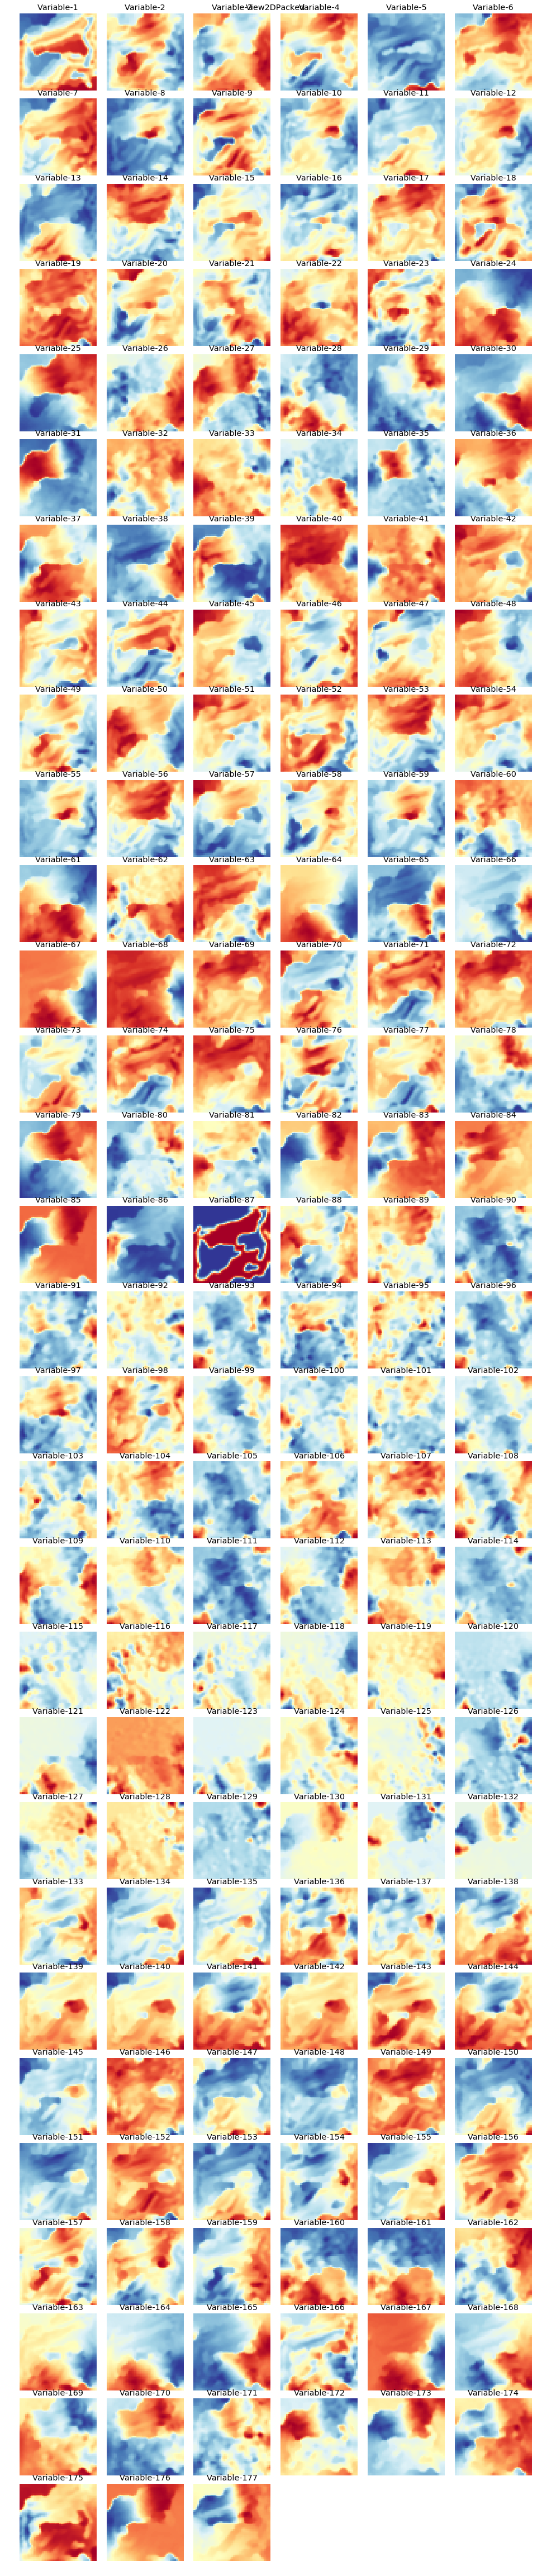

In [23]:
# som.component_names = ["Upper spine Accel Earth X,mG", "Upper spine Accel Earth Y,mG", "Upper spine Accel Earth Z,mG", "LT Upper arm Accel Earth X,mG", "LT Upper arm Accel Earth Y,mG", "LT Upper arm Accel Earth Z,mG"]
v  = sompy.mapview.View2DPacked(5, 5, 'View2DPacked',text_size=12)
v.show(som, what='codebook', cmap=None, col_sz=6) #which_dim='all' default

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


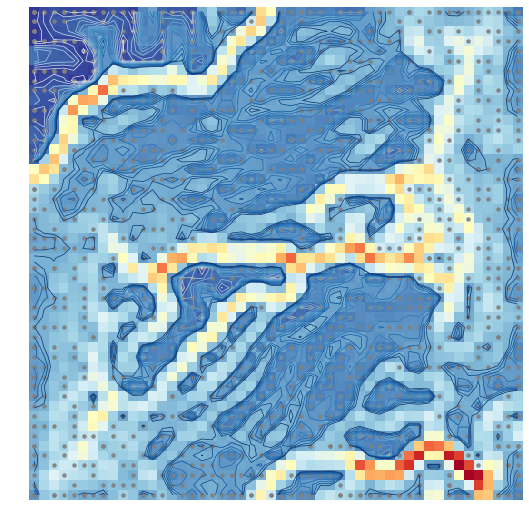

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fc6283939b0>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fc6283939b0>
Setting pcolormesh
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


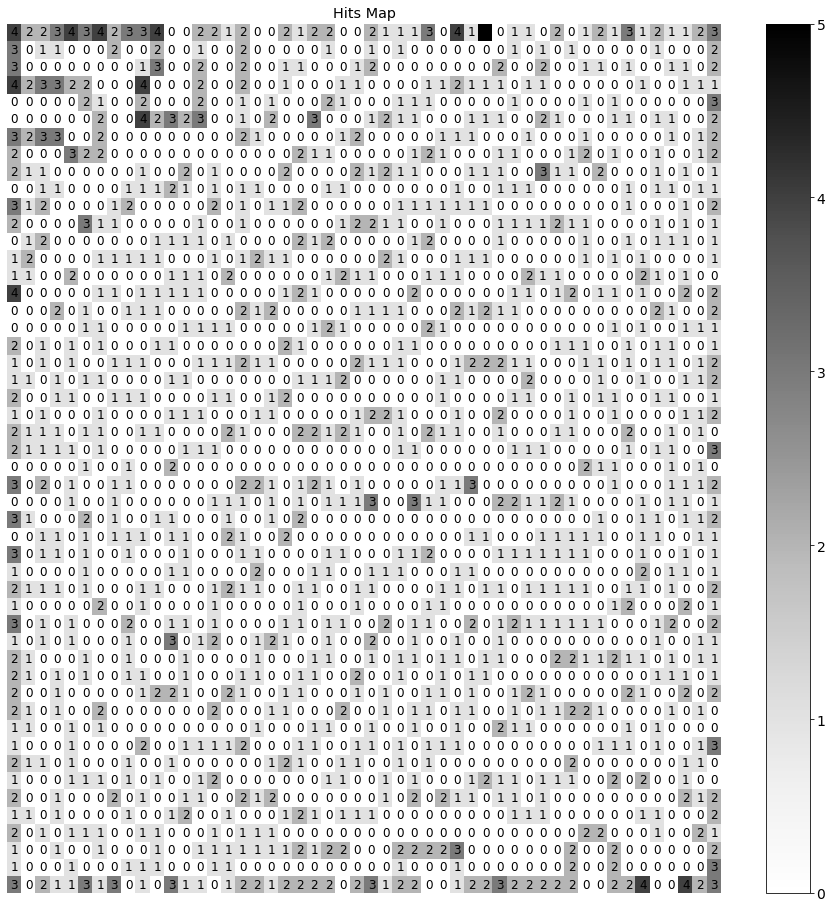

/home/mariana/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
update_title_pos
update_title_pos
update_title_pos
update_title_pos


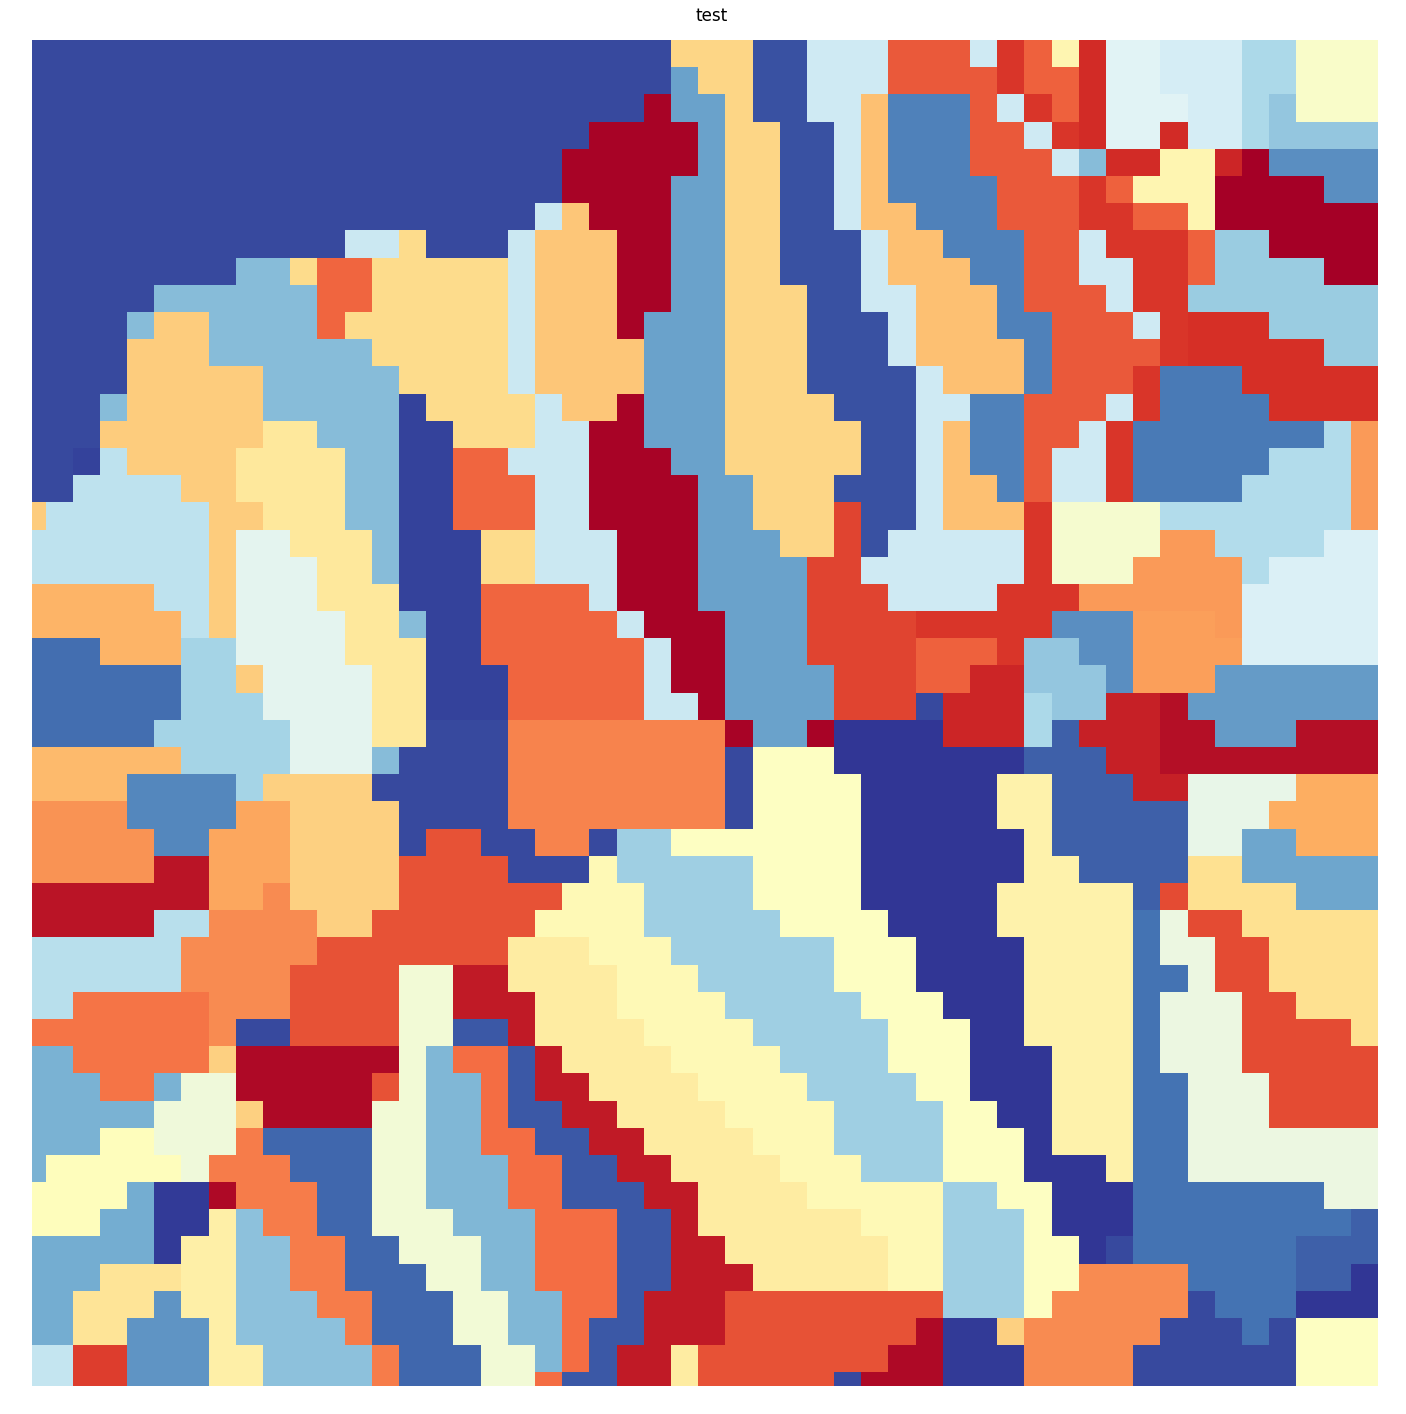

In [24]:
umat = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)
umat.show(som)

from sompy.visualization.bmuhits import BmuHitsView
bmuhits  = BmuHitsView(50,50,"Hits Map",text_size=14)
bmuhits.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

v  = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  
som.cluster(n_clusters=90)
v.show(som, what='cluster')

NameError: name 'group_1' is not defined